ATHUL REJI JOSEPH


TASK 3 : CAR PRICE PREDICTION USING MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. We want to learn
how to train a car price prediction model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [135]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [136]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [137]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [139]:
print("columns_count :", df.shape[1])
print("row_count:",df.shape[0])
print("names:","\n",df.columns)

columns_count : 9
row_count: 301
names: 
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [140]:
df.duplicated().sum()

2

In [141]:
df.drop_duplicates(inplace=True)

In [142]:
df.drop(['Car_Name'],axis=1,inplace=True)
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [143]:
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [144]:
df['current_year']=2024

In [145]:
df['Age_of_car']=df['current_year']-df['Year']
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current_year,Age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2024,8
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2024,9
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2024,15
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2024,7


In [146]:
df.drop(['current_year','Year'],axis=1,inplace=True)
df

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [147]:
df=pd.get_dummies(df,drop_first=True)
df

,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,1,0,0,1
297,4.00,5.90,60000,0,9,0,1,0,1
298,3.35,11.00,87934,0,15,0,1,0,1
299,11.50,12.50,9000,0,7,1,0,0,1


In [148]:
g=['Fuel_Type_Diesel','Fuel_Type_Petrol','Selling_type_Individual','Transmission_Manual']
df[g]=df[g].astype('int')

In [149]:

df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [150]:
df.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876305,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876305,1.000000,0.205224,0.009948,0.053167,0.464934,-0.456829,-0.511779,-0.334326
Driven_kms,0.028566,0.205224,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009948,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Age_of_car,-0.234369,0.053167,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464934,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456829,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Selling_type_Individual,-0.553851,-0.511779,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334326,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


<Axes: >

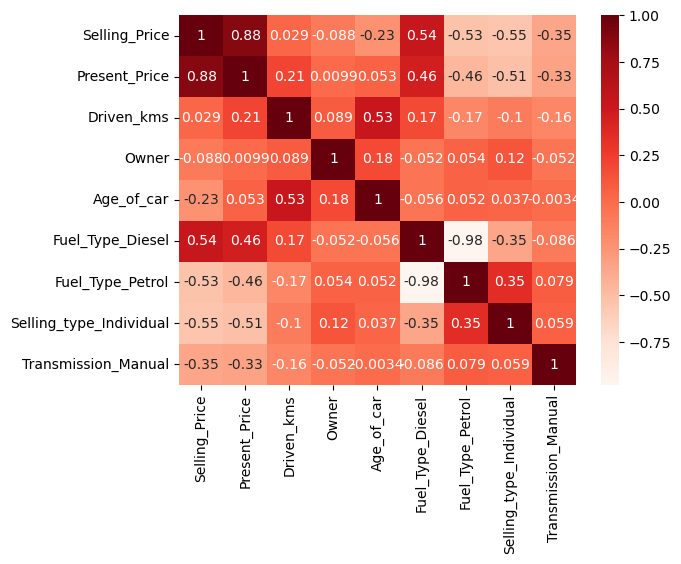

In [151]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [152]:
y=df['Selling_Price']
x=df.drop(columns=['Selling_Price'])


In [153]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [154]:
x

,Present_Price,Driven_kms,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,10,0,1,0,1
1,9.54,43000,0,11,1,0,0,1
2,9.85,6900,0,7,0,1,0,1
3,4.15,5200,0,13,0,1,0,1
4,6.87,42450,0,10,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,8,1,0,0,1
297,5.90,60000,0,9,0,1,0,1
298,11.00,87934,0,15,0,1,0,1
299,12.50,9000,0,7,1,0,0,1


In [155]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [156]:
print(model.feature_importances_)

[0.42349325 0.03857286 0.00094989 0.08477544 0.0852285  0.02627337
 0.23595771 0.10474898]


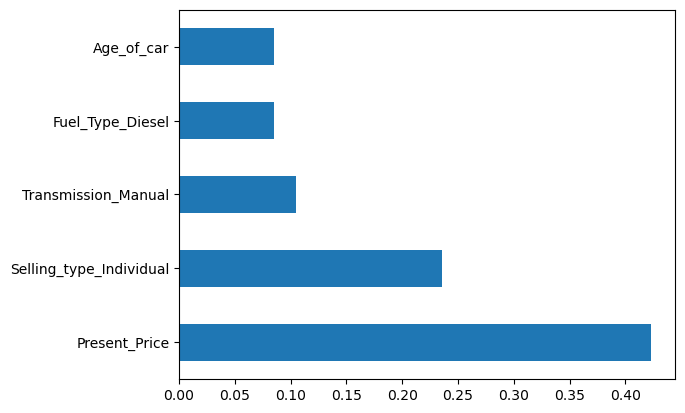

In [157]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [159]:
x_train.shape

(239, 8)

In [160]:
x_test.shape

(60, 8)

In [161]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [162]:
y_predict=regressor.predict(x_test)
y_predict

array([ 0.2056,  7.443 ,  2.503 ,  1.4835,  4.3701, 15.4643,  4.1905,
        0.5378, 14.9306,  1.2015,  2.9025,  0.2079, 22.4951,  2.994 ,
        1.854 ,  2.4045,  4.7935, 19.9993,  7.6466,  7.5745,  6.7815,
        1.2278, 10.6129,  4.1107,  0.6361,  4.9791,  3.355 , 20.7255,
       12.2068,  0.2649,  7.4846,  1.036 ,  2.912 ,  2.539 ,  3.988 ,
        4.6205,  4.3281,  0.1997,  4.7885,  0.4605,  5.7465,  7.0905,
       14.8844,  3.687 ,  5.2635,  1.0255,  1.5445,  5.9285,  5.0735,
        9.32  ,  4.364 , 13.8569,  6.2489,  7.6466,  0.8637,  1.1859,
        2.9545,  7.3716,  2.4875,  0.5508])

In [163]:
x_train.head(1)


,Present_Price,Driven_kms,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
239,4.43,23709,0,12,0,1,0,1


In [164]:
input_data_model=pd.DataFrame(
   [[4.43	, 23709,	0,	12,	0,	1,	0,	1]],
   columns=['Present_Price',	'Driven_kms',	'Owner',	'Age_of_car',	'Fuel_Type_Diesel',	'Fuel_Type_Petrol',	'Selling_type_Individual',	'Transmission_Manual'])

In [165]:
input_data_model

,Present_Price,Driven_kms,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,4.43,23709,0,12,0,1,0,1


In [166]:
regressor.predict(input_data_model)

array([2.215])